In [1]:
import pandas as pd

### Classification problem with 'car.data' (https://archive.ics.uci.edu/ml/machine-learning-databases/car/)

#### EDA

In [2]:
df_cars_raw_data = pd.read_csv('car.data', header=None, names=['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'eval'])

In [3]:
df_cars_raw_data.shape

(1728, 7)

In [4]:
df_cars_raw_data.head()

,buying,maint,doors,persons,lug_boot,safety,eval
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [5]:
df_cars_raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 7 columns):
buying      1728 non-null object
maint       1728 non-null object
doors       1728 non-null object
persons     1728 non-null object
lug_boot    1728 non-null object
safety      1728 non-null object
eval        1728 non-null object
dtypes: object(7)
memory usage: 94.6+ KB


In [6]:
df_cars_raw_data = df_cars_raw_data.astype('category')

In [7]:
for col in df_cars_raw_data.columns:
    df_cars_raw_data[col] = df_cars_raw_data[col].cat.codes

In [8]:
df_cars_raw_data.head()

,buying,maint,doors,persons,lug_boot,safety,eval
0,3,3,0,0,2,1,2
1,3,3,0,0,2,2,2
2,3,3,0,0,2,0,2
3,3,3,0,0,1,1,2
4,3,3,0,0,1,2,2


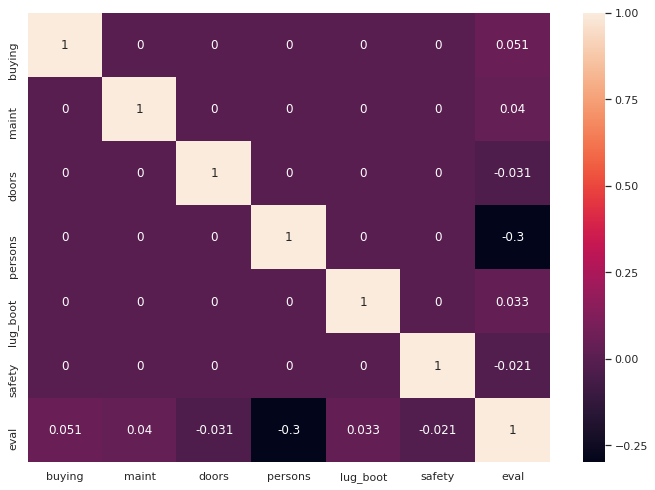

In [9]:
import seaborn as sns
%matplotlib inline
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.heatmap(df_cars_raw_data.corr(), annot=True)

#### Model Experiments (training and testing various models)

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier as DTC
from sklearn.naive_bayes import GaussianNB as NBC
from sklearn.ensemble import RandomForestClassifier as RFC
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier as KNC
from sklearn.metrics import accuracy_score

In [11]:
x_train, x_test, y_train, y_test = train_test_split(df_cars_raw_data[['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety']], df_cars_raw_data['eval'], random_state=0, test_size=.2, stratify=df_cars_raw_data['eval'])

print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(1382, 6) (1382,)
(346, 6) (346,)


In [12]:
dtc_model_1 = DTC(random_state=0)
dtc_model_1.fit(x_train, y_train)
dtc_model_1_y_hat = dtc_model_1.predict(x_test)
dtc_model_1_accuracy = accuracy_score(y_test, dtc_model_1_y_hat)

nbc_model_1 = NBC()
nbc_model_1.fit(x_train, y_train)
nbc_model_1_y_hat = nbc_model_1.predict(x_test)
nbc_model_1_accuracy = accuracy_score(y_test, nbc_model_1_y_hat)

rfc_model_1 = RFC(random_state=0)
rfc_model_1.fit(x_train, y_train)
rfc_model_1_y_hat = rfc_model_1.predict(x_test)
rfc_model_1_accuracy = accuracy_score(y_test, rfc_model_1_y_hat)

svc_model_1 = SVC(random_state=0)
svc_model_1.fit(x_train, y_train)
svc_model_1_y_hat = svc_model_1.predict(x_test)
svc_model_1_accuracy = accuracy_score(y_test, svc_model_1_y_hat)

knc_model_1 = KNC()
knc_model_1.fit(x_train, y_train)
knc_model_1_y_hat = knc_model_1.predict(x_test)
knc_model_1_accuracy = accuracy_score(y_test, knc_model_1_y_hat)

/home/ngarg/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/ngarg/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [13]:
model_names = ['dtc_model_1', 'nbc_model_1', 'rfc_model_1', 'svc_model_1', 'knc_model_1']
accuracy_scores = [dtc_model_1_accuracy, nbc_model_1_accuracy, rfc_model_1_accuracy, svc_model_1_accuracy, knc_model_1_accuracy]
df_model_evaluation = pd.DataFrame({'model_name': model_names, 'accuracy_score': accuracy_scores})
df_model_evaluation

,model_name,accuracy_score
0,dtc_model_1,0.956647
1,nbc_model_1,0.601156
2,rfc_model_1,0.959538
3,svc_model_1,0.895954
4,knc_model_1,0.867052


#### Note that from the above models evaluation result, you should choose dtc_model_1 as it is more parsimonious (following Ockham's Razor) and the difference in accuracy is negligible compared to rfc_model_1.

#### Hyperparameter tuning for improved models

In [14]:
df_cars_raw_data['eval'].value_counts()

2    1210
0     384
1      69
3      65
Name: eval, dtype: int64

In [15]:
from sklearn.model_selection import GridSearchCV

dtc_hyperparameters_grid = {
    'criterion': ['gini', 'entropy'], 
    'splitter': ['best', 'random'],
    'max_depth': [None, 2, 4, 8, 16, 32], 
    'max_features': [None, 'sqrt', 'log2'],
}
dtc_model_2 = GridSearchCV(estimator=DTC(random_state=0, class_weight={2:18, 0:6, 1:1, 3:1}), param_grid=dtc_hyperparameters_grid, cv=4)
dtc_model_2.fit(x_train, y_train)
dtc_model_2_y_hat = dtc_model_2.predict(x_test)
dtc_model_2_accuracy = accuracy_score(y_test, dtc_model_2_y_hat)

rfc_hyperparameters_grid = {
    'n_estimators': [10, 50, 100, 200, 500],
    'criterion': ['gini', 'entropy'], 
    'max_depth': [None, 2, 4, 8, 16, 32], 
    'max_features': [None, 'sqrt', 'log2'],
}
rfc_model_2 = GridSearchCV(estimator=RFC(random_state=0, class_weight={2:18, 0:6, 1:1, 3:1}), param_grid=rfc_hyperparameters_grid, cv=4)
rfc_model_2.fit(x_train, y_train)
rfc_model_2_y_hat = rfc_model_2.predict(x_test)
rfc_model_2_accuracy = accuracy_score(y_test, rfc_model_2_y_hat)

svc_hyperparameters_grid = {
    'C': [1, 1.1, 1.2, 1.5, 2, 2.5],
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'], 
}
svc_model_2 = GridSearchCV(estimator=SVC(random_state=0, class_weight={2:18, 0:6, 1:1, 3:1}), param_grid=svc_hyperparameters_grid, cv=4)
svc_model_2.fit(x_train, y_train)
svc_model_2_y_hat = svc_model_2.predict(x_test)
svc_model_2_accuracy = accuracy_score(y_test, svc_model_2_y_hat)

knc_hyperparameters_grid = {
    'n_neighbors': [5, 10, 15, 20],
}
knc_model_2 = GridSearchCV(estimator=KNC(), param_grid=knc_hyperparameters_grid, cv=4)
knc_model_2.fit(x_train, y_train)
knc_model_2_y_hat = knc_model_2.predict(x_test)
knc_model_2_accuracy = accuracy_score(y_test, knc_model_2_y_hat)

model_names_2 = ['dtc_model_2', 'rfc_model_2', 'svc_model_2', 'knc_model_2']
accuracy_scores_2 = [dtc_model_2_accuracy, rfc_model_2_accuracy, svc_model_2_accuracy, knc_model_2_accuracy]
df_model_evaluation_2 = pd.DataFrame({'model_name': model_names_2, 'accuracy_score': accuracy_scores_2})

/home/ngarg/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/ngarg/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/ngarg/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/ngarg/anaconda3/lib/python3.7/site-packages/sklearn/

/home/ngarg/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/ngarg/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/ngarg/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/ngarg/anaconda3/lib/python3.7/site-packages/sklearn/

/home/ngarg/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/ngarg/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/ngarg/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/ngarg/anaconda3/lib/python3.7/site-packages/sklearn/

In [20]:
df_model_evaluation = df_model_evaluation.append(df_model_evaluation_2)

#### Note that in the real-world, you would probably want to select 2 or 3 models from the above for production pilot testing (for example: dtc_model_2, rfc_model_2 and svc_model_2), then based on the results of the pilot testing over some period of time you can settle with the best performing model.

In [21]:
from sklearn.metrics import balanced_accuracy_score, recall_score, precision_score, f1_score

balanced_accuracy_scores = [balanced_accuracy_score(y_test, dtc_model_1_y_hat), 
                            balanced_accuracy_score(y_test, nbc_model_1_y_hat),
                            balanced_accuracy_score(y_test, rfc_model_1_y_hat),
                            balanced_accuracy_score(y_test, svc_model_1_y_hat), 
                            balanced_accuracy_score(y_test, knc_model_1_y_hat),
                            balanced_accuracy_score(y_test, dtc_model_2_y_hat),
                            balanced_accuracy_score(y_test, rfc_model_2_y_hat), 
                            balanced_accuracy_score(y_test, svc_model_2_y_hat),
                            balanced_accuracy_score(y_test, knc_model_2_y_hat)]

recall_scores = [recall_score(y_test, dtc_model_1_y_hat, average='micro'), 
                 recall_score(y_test, nbc_model_1_y_hat, average='micro'),
                 recall_score(y_test, rfc_model_1_y_hat, average='micro'),
                 recall_score(y_test, svc_model_1_y_hat, average='micro'), 
                 recall_score(y_test, knc_model_1_y_hat, average='micro'),
                 recall_score(y_test, dtc_model_2_y_hat, average='micro'),
                 recall_score(y_test, rfc_model_2_y_hat, average='micro'), 
                 recall_score(y_test, svc_model_2_y_hat, average='micro'),
                 recall_score(y_test, knc_model_2_y_hat, average='micro')]

precision_scores = [precision_score(y_test, dtc_model_1_y_hat, average='micro'), 
                    precision_score(y_test, nbc_model_1_y_hat, average='micro'),
                    precision_score(y_test, rfc_model_1_y_hat, average='micro'),
                    precision_score(y_test, svc_model_1_y_hat, average='micro'), 
                    precision_score(y_test, knc_model_1_y_hat, average='micro'),
                    precision_score(y_test, dtc_model_2_y_hat, average='micro'),
                    precision_score(y_test, rfc_model_2_y_hat, average='micro'), 
                    precision_score(y_test, svc_model_2_y_hat, average='micro'),
                    precision_score(y_test, knc_model_2_y_hat, average='micro')]

f1_scores = [f1_score(y_test, dtc_model_1_y_hat, average='micro'), 
            f1_score(y_test, nbc_model_1_y_hat, average='micro'),
            f1_score(y_test, rfc_model_1_y_hat, average='micro'),
            f1_score(y_test, svc_model_1_y_hat, average='micro'), 
            f1_score(y_test, knc_model_1_y_hat, average='micro'),
            f1_score(y_test, dtc_model_2_y_hat, average='micro'),
            f1_score(y_test, rfc_model_2_y_hat, average='micro'), 
            f1_score(y_test, svc_model_2_y_hat, average='micro'),
            f1_score(y_test, knc_model_2_y_hat, average='micro')]

df_model_evaluation['balanced_accuracy'] = balanced_accuracy_scores
df_model_evaluation['recall'] = recall_scores
df_model_evaluation['precision'] = precision_scores
df_model_evaluation['f1_score'] = f1_scores

df_model_evaluation

,model_name,accuracy_score,balanced_accuracy,recall,precision,f1_score
0,dtc_model_1,0.956647,0.948597,0.956647,0.956647,0.956647
1,nbc_model_1,0.601156,0.460301,0.601156,0.601156,0.601156
2,rfc_model_1,0.959538,0.894242,0.959538,0.959538,0.959538
3,svc_model_1,0.895954,0.751135,0.895954,0.895954,0.895954
4,knc_model_1,0.867052,0.590796,0.867052,0.867052,0.867052
0,dtc_model_2,0.979769,0.935122,0.979769,0.979769,0.979769
1,rfc_model_2,0.973988,0.967237,0.973988,0.973988,0.973988
2,svc_model_2,0.965318,0.860446,0.965318,0.965318,0.965318
3,knc_model_2,0.867052,0.590796,0.867052,0.867052,0.867052
